# Diamond Price Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
data = pd.read_csv("diamonds.csv")
data.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.shape

(53940, 11)

## Data Cleaning

In [4]:
data = data.drop(["Unnamed: 0"],axis=1)

In [5]:
data.shape

(53940, 10)

In [6]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
data["size"] = data["x"] * data["y"] * data["z"]
print(data)

       carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

             size  
0       38.202030  

## Exploratory Data Analysis

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  size     53940 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.5+ MB


In [9]:
data.describe()

,carat,depth,table,price,x,y,z,size
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,129.849403
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,78.245262
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,65.136830
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.808572
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,170.842451
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,3840.598060


In [10]:
data['price'].mean()

3932.799721913237

In [11]:
data['size'].median()

114.80857200000001

In [12]:
data['carat'].mode()

0    0.3
Name: carat, dtype: float64

## Data Visualization

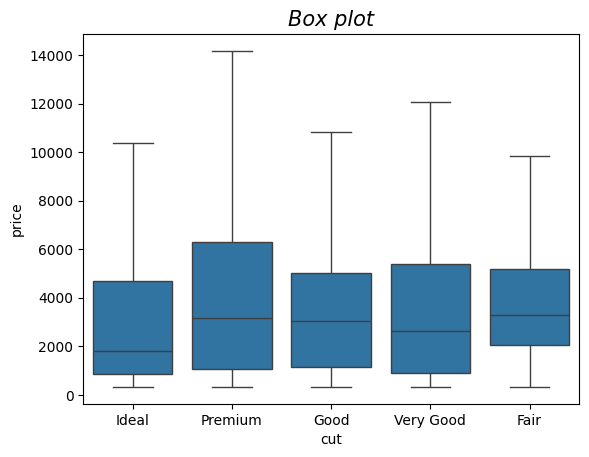

In [13]:
sns.boxplot(x=data["cut"], y=data["price"],showfliers=False)
plt.title("Box plot",fontsize=15,fontstyle='italic')
plt.show()

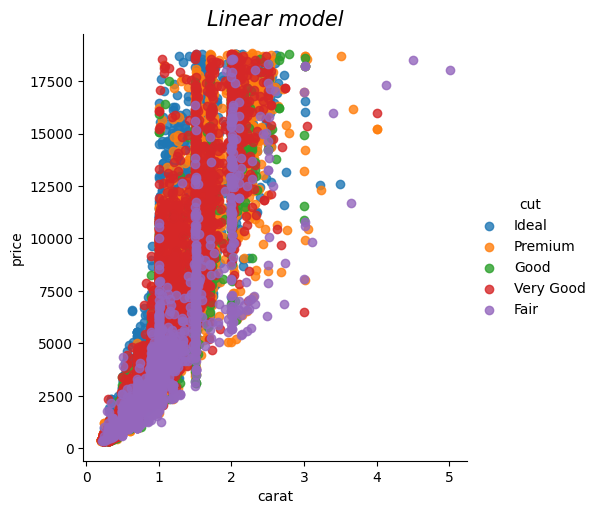

In [14]:
sns.lmplot(x='carat', y='price', data=data,fit_reg=False,hue='cut')
plt.title("Linear model",fontsize=15,fontstyle='italic')
plt.show()

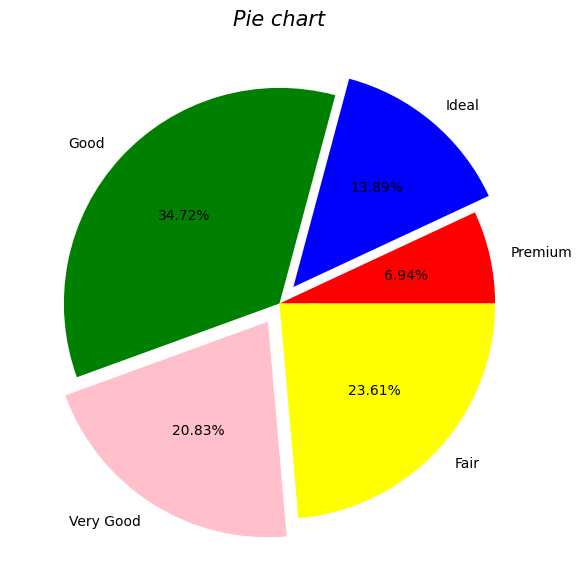

In [15]:
plt.figure(figsize=(7,7))
slices = [10,20,50,30,34]
cut = ["Premium","Ideal","Good","Very Good","Fair"]
cols = ["red","blue","green","pink","yellow"]
plt.title("Pie chart",fontsize=15,fontstyle='italic')
plt.pie(slices,labels=cut,colors=cols,autopct="%1.2f%%",explode=(0,0.1,0,0.1,0))
plt.show()

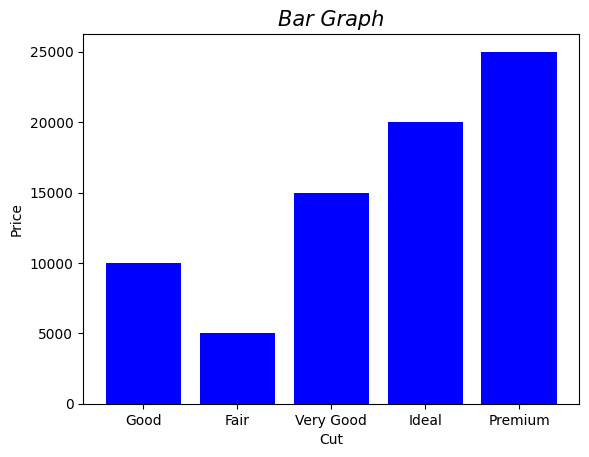

In [16]:
data = {
    'cut': ['Good', 'Fair', 'Very Good', 'Ideal', 'Premium'],
    'price': [10000, 5000, 15000, 20000, 25000]
}

data = pd.DataFrame(data)
plt.bar(data['cut'],data['price'], color='blue')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.title('Bar Graph',fontsize=15,fontstyle='italic')
plt.show()
